In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

train = load_data('train.json')
valid = load_data('valid.json')
test = load_data('test.json')

In [3]:

print(f"Train size: {len(train)}")
print(f"Validation size: {len(valid)}")
print(f"Test size: {len(test)}")


Train size: 2236
Validation size: 959
Test size: 640


In [4]:
print("\nSample Entry:")
print(json.dumps(train[0], indent=2))


Sample Entry:
{
  "uri": "4367393",
  "question": "what is parkinesonism?",
  "context": "",
  "answers": [
    "u spelt it wrong !!\nParkinson's disease is one of the most common neurologic disorders of the elderly. The term \"parkinsonism\" refers to any condition that causes any combination of the types of movement abnormalities seen in Parkinson's disease by damaging or destroying dopamine neurons in a certain area of the brain.",
    "Parkinsonism describes the common symptoms of Parkinson's disease - tremor, rigidity, akinesia or bradykinesia and postural instability. Those patients who respond to drug treatment for Parkinson's disease are diagnosed with it, and those who do not have parkinsonism."
  ],
  "labelled_answer_spans": {
    "INFORMATION": [
      {
        "txt": "Parkinson's disease is one of the most common neurologic disorders of the elderly. The term \"parkinsonism\" refers to any condition that causes any combination of the types of movement abnormalities seen i

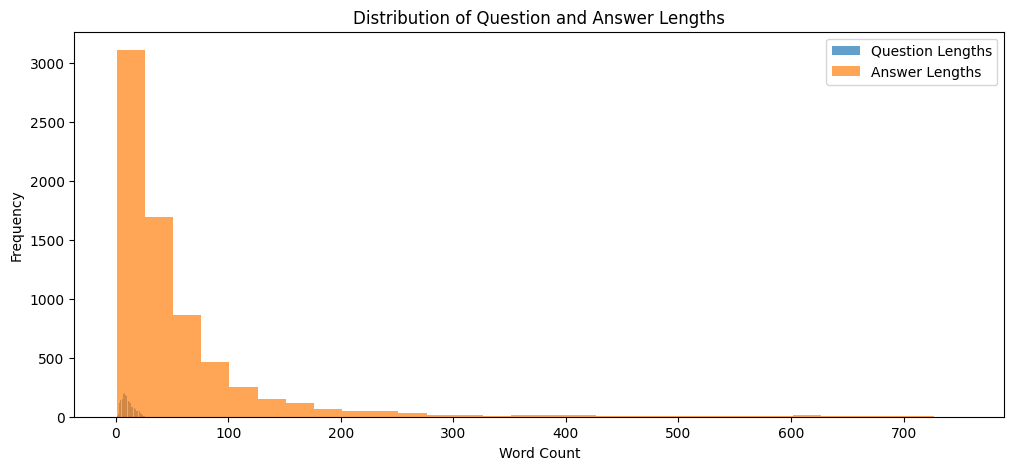

In [5]:
def get_lengths(data):
    question_lengths = [len(q['question'].split()) for q in data]
    answer_lengths = [len(ans.split()) for q in data for ans in q['answers']]
    return question_lengths, answer_lengths

q_lengths, a_lengths = get_lengths(train)

plt.figure(figsize=(12,5))
plt.hist(q_lengths, bins=30, alpha=0.7, label='Question Lengths')
plt.hist(a_lengths, bins=30, alpha=0.7, label='Answer Lengths')
plt.legend()
plt.title("Distribution of Question and Answer Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

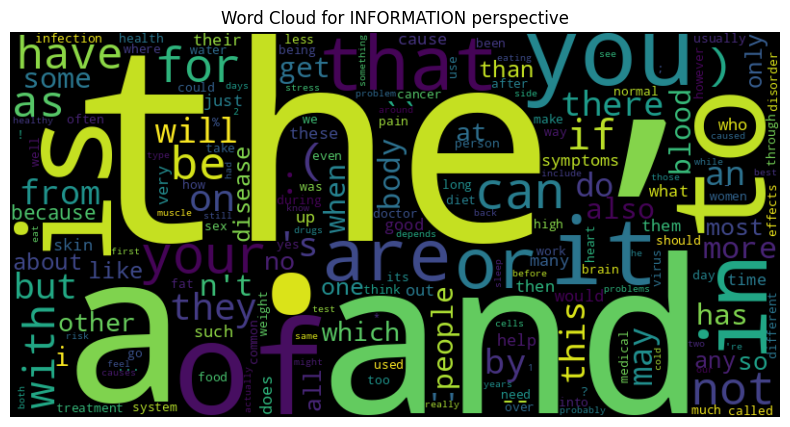

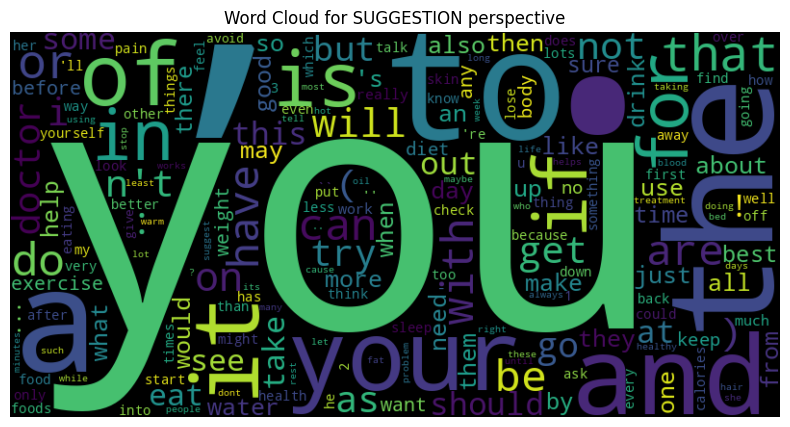

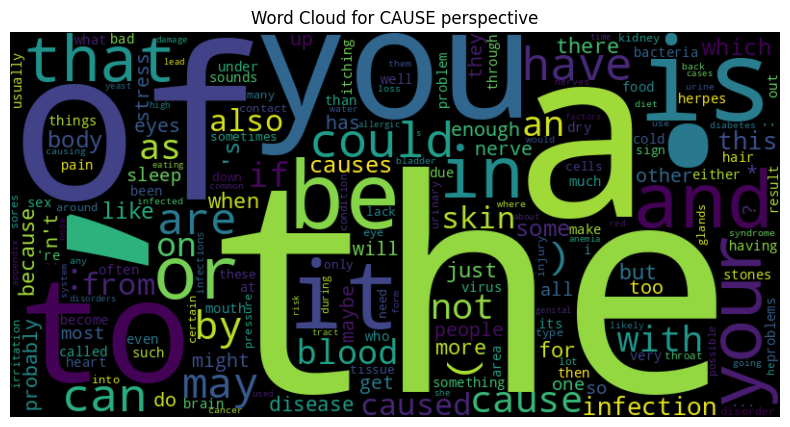

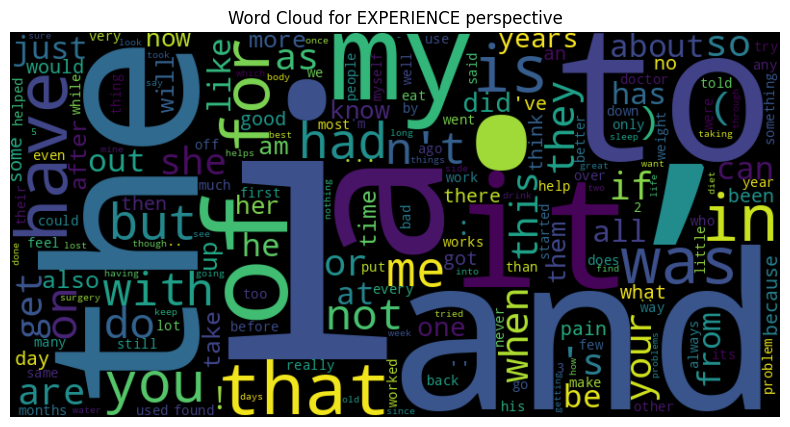

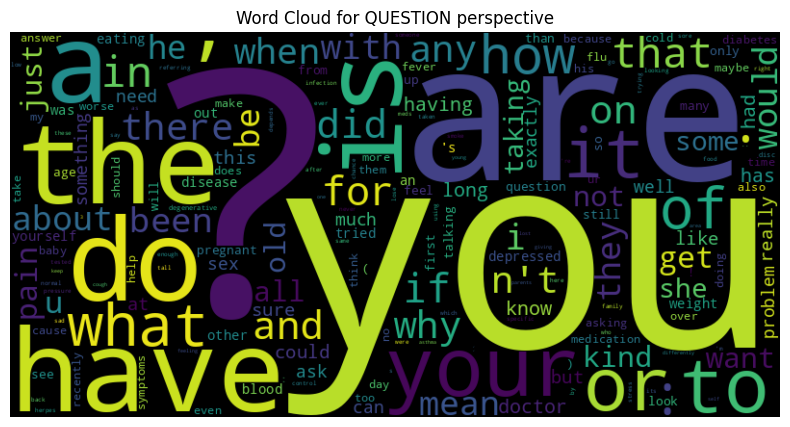

In [14]:
def generate_wordcloud(data, label):
    all_words = []
    for entry in data:
        spans = entry.get('labelled_answer_spans', {}).get(label, [])
        all_words.extend([word for span in spans for word in word_tokenize(span['txt'].lower())])
    word_freq = Counter(all_words)
    wc = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {label} perspective")
    plt.show()

for label in label_counts:
    generate_wordcloud(train, label)

In [20]:
train_df = pd.DataFrame(train)
val_df = pd.DataFrame(valid)
test_df = pd.DataFrame(test)

In [21]:
train_df.head()

,uri,question,context,answers,labelled_answer_spans,labelled_summaries,raw_text
0,4367393,what is parkinesonism?,,[u spelt it wrong !!\nParkinson's disease is o...,{'INFORMATION': [{'txt': 'Parkinson's disease ...,{'INFORMATION_SUMMARY': 'Parkinson's disease i...,uri: 4367393\nquestion: what is parkinesonism?...
1,1504599,"I scream, shout and swear in my sleep. How do ...",My mom always told me that I talk a lot in my ...,[hmm i would say duck tape but thats a lil to ...,"{'SUGGESTION': [{'txt': 'duck tape', 'label_sp...",{'CAUSE_SUMMARY': 'Shouting during sleep may b...,"uri: 1504599\nquestion: I scream, shout and sw..."
2,1701378,what does m.c.h.c stand for in my hematology t...,,"[Mean Corpuscular Hemoglobin Concentration\n""T...",{'INFORMATION': [{'txt': ': Mean Corpuscular H...,{'INFORMATION_SUMMARY': 'For information purpo...,uri: 1701378\nquestion: what does m.c.h.c stan...
3,45070,whats the best way to clear pluged up sinuses?,,[i use a nasal bulb and saline water. 1/8 teas...,{'SUGGESTION': [{'txt': 'i use a nasal bulb an...,{'SUGGESTION_SUMMARY': 'One individual recomme...,uri: 45070\nquestion: whats the best way to cl...
4,1752893,Are their any good home remedies for tooth pain?,,[Clove Oil from a health store works really we...,{'SUGGESTION': [{'txt': 'try putting a wet tea...,"{'EXPERIENCE_SUMMARY': 'In users expereince, o...",uri: 1752893\nquestion: Are their any good hom...


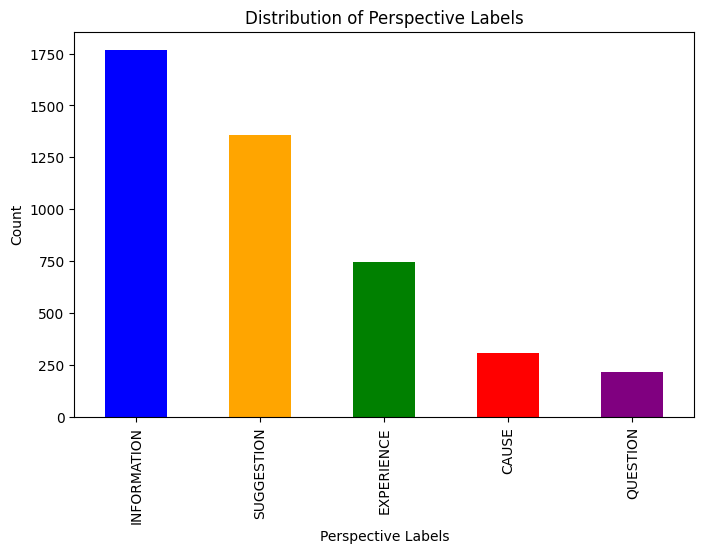

In [22]:
import matplotlib.pyplot as plt

# Count occurrences of each perspective
label_counts = train_df['labelled_answer_spans'].explode().value_counts()

# Plot the distribution
plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Perspective Labels")
plt.ylabel("Count")
plt.title("Distribution of Perspective Labels")
plt.show()


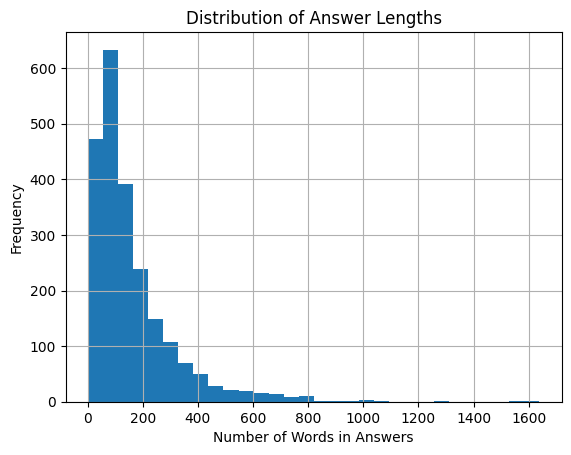

In [23]:
train_df['answer_length'] = train_df['answers'].apply(lambda x: len(str(x).split()))
train_df['answer_length'].hist(bins=30)
plt.xlabel("Number of Words in Answers")
plt.ylabel("Frequency")
plt.title("Distribution of Answer Lengths")
plt.show()


In [24]:
label_counts = train_df['labelled_answer_spans'].explode().value_counts()

# Print the counts for each perspective
for label, count in label_counts.items():
    print(f"Perspective: {label}, Count: {count}")

Perspective: INFORMATION, Count: 1767
Perspective: SUGGESTION, Count: 1360
Perspective: EXPERIENCE, Count: 747
Perspective: CAUSE, Count: 308
Perspective: QUESTION, Count: 215


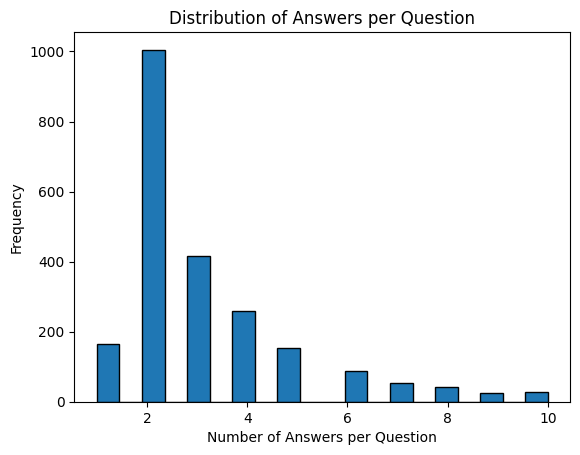

In [25]:
# Calculate the number of answers for each question
answers_per_question = train_df['answers'].apply(len)

# Create the histogram
plt.hist(answers_per_question, bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel("Number of Answers per Question")
plt.ylabel("Frequency")
plt.title("Distribution of Answers per Question")
plt.show()